In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/506.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/507.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/505.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/515.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/513.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/512.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/509.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/508.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/511.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/514.csv
/kaggle/input/adult-subjects-70-95-years-activity-recognition/504.csv
/kaggle/input/adult-

## **Count the number of rows and columns in each dataset:**

In [2]:
import numpy as np 
import pandas as pd 

#List all file paths in the '/kaggle/input' directory
lis_paths = []
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        lis_paths.append(os.path.join(dirname, filename))

#Initialize an empty dictionary to store data 
data = {}
#Iterate through each file path and read CSV files
for i,path in enumerate(lis_paths):
    temp = pd.read_csv(path)
    #Extract filename and use it as a key in the data dictionary
    data[path.split('/')[-1].split('.')[0]] = temp
    print(path.split('/')[-1].split('.')[0],temp.shape)

503 (116413, 8)
506 (122714, 8)
507 (120125, 8)
505 (87006, 8)
515 (153517, 8)
513 (123599, 8)
512 (119310, 8)
509 (121763, 8)
502 (131367, 8)
508 (130494, 8)
501 (103860, 8)
511 (128063, 8)
514 (101510, 8)
504 (150758, 8)
510 (122061, 8)


## **Checking for Null Values in each dataset:**

In [3]:
for key,value in data.items():
    print(key,value.isnull().sum())

503 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
506 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
507 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
505 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
515 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
513 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
512 timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64
509 timestamp    0
back_x       0
back_y 

## **Combining all the 15 csv files:**

In [4]:
import pandas as pd
import os

directory_path = '/kaggle/input/adult-subjects-70-95-years-activity-recognition'

# Listing all CSV files in the specified directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

# Initializing an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each CSV file and concatenate the data
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    current_data = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, current_data], ignore_index=True)

combined_data.to_csv('/kaggle/working/combined_data.csv', index=False)
print(combined_data)

                       timestamp    back_x    back_y    back_z   thigh_x  \
0        2021-03-29 14:42:07.460 -0.971680 -0.072266 -0.175781 -1.712158   
1        2021-03-29 14:42:07.480 -1.364746  0.182861 -0.377197 -1.580322   
2        2021-03-29 14:42:07.500 -1.249512  0.182129 -0.466553 -1.052734   
3        2021-03-29 14:42:07.520 -0.841553 -0.026855 -0.445557 -0.863281   
4        2021-03-29 14:42:07.539 -0.669189 -0.068115 -0.380371 -0.720215   
...                          ...       ...       ...       ...       ...   
1832555  2021-05-07 08:58:45.009 -0.974121  0.107666 -0.255615 -1.002930   
1832556  2021-05-07 08:58:45.029 -0.958008  0.093018 -0.255615 -0.998779   
1832557  2021-05-07 08:58:45.049 -0.957764  0.076660 -0.257568 -0.967529   
1832558  2021-05-07 08:58:45.069 -0.946045  0.073730 -0.243164 -0.971680   
1832559  2021-05-07 08:58:45.090 -0.928223  0.074219 -0.238770 -0.971680   

          thigh_y   thigh_z  label  
0       -0.120117  1.502686      6  
1       -0.17

## **Checking for Null Values for the combined dataset:** 

In [5]:
print(combined_data.isnull().sum())

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64


In [6]:
#Printing the first 5 rows of the combined dataset:
print(combined_data.head())

                 timestamp    back_x    back_y    back_z   thigh_x   thigh_y  \
0  2021-03-29 14:42:07.460 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1  2021-03-29 14:42:07.480 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2  2021-03-29 14:42:07.500 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3  2021-03-29 14:42:07.520 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4  2021-03-29 14:42:07.539 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   

    thigh_z  label  
0  1.502686      6  
1 -0.145508      6  
2 -0.783691      6  
3 -0.416992      6  
4 -0.291504      6  


In [7]:
#Shape of the combined dataset:
print(combined_data.shape)

(1832560, 8)


In [8]:
#Checking duplicate values in the combined dataset:
print("Duplicate values in the combined data ----> ",combined_data.duplicated().sum())

Duplicate values in the combined data ---->  0


In [9]:
#Convert 'timestamp' column to datetime format
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])

#Add a new column 'timestamp_seconds' to store the timestamp in seconds
combined_data['timestamp_seconds'] = combined_data['timestamp'].apply(lambda x: x.timestamp())

combined_data['timestamp_seconds']

0          1.617029e+09
1          1.617029e+09
2          1.617029e+09
3          1.617029e+09
4          1.617029e+09
               ...     
1832555    1.620378e+09
1832556    1.620378e+09
1832557    1.620378e+09
1832558    1.620378e+09
1832559    1.620378e+09
Name: timestamp_seconds, Length: 1832560, dtype: float64

In [10]:
#Update 'timestamp' column with values from 'timestamp_seconds'
combined_data['timestamp'] = combined_data['timestamp_seconds']
combined_data['timestamp']

0          1.617029e+09
1          1.617029e+09
2          1.617029e+09
3          1.617029e+09
4          1.617029e+09
               ...     
1832555    1.620378e+09
1832556    1.620378e+09
1832557    1.620378e+09
1832558    1.620378e+09
1832559    1.620378e+09
Name: timestamp, Length: 1832560, dtype: float64

In [12]:
print(combined_data)

           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  \
0       -0.971680 -0.072266 -0.175781 -1.712158 -0.120117  1.502686      6   
1       -1.364746  0.182861 -0.377197 -1.580322 -0.170166 -0.145508      6   
2       -1.249512  0.182129 -0.466553 -1.052734 -0.261719 -0.783691      6   
3       -0.841553 -0.026855 -0.445557 -0.863281 -0.132568 -0.416992      6   
4       -0.669189 -0.068115 -0.380371 -0.720215 -0.083496 -0.291504      6   
...           ...       ...       ...       ...       ...       ...    ...   
1832555 -0.974121  0.107666 -0.255615 -1.002930  0.034424  0.113525      6   
1832556 -0.958008  0.093018 -0.255615 -0.998779  0.019043  0.124756      6   
1832557 -0.957764  0.076660 -0.257568 -0.967529  0.021484  0.092529      6   
1832558 -0.946045  0.073730 -0.243164 -0.971680  0.018066  0.095947      6   
1832559 -0.928223  0.074219 -0.238770 -0.971680 -0.001221  0.100342      6   

         timestamp_seconds  
0             1.617029e+09  
1    

## **Data Analysis:** 

In [13]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [14]:
#Labels mapping to human-readable activity names
labels_dic = {1:'walking',3:"shiuffling",4:"stairs (ascending)",5:"stairs (descending)",6:"standing",7:"sitting",8:"lying"}

# Extracting keys and values from the labels dictionary
labels_key = list(labels_dic.keys()) 
labels_values = list(labels_dic.values()) 
# Count the occurrences of each label in the combined dataset
counts = []

for label,value in zip(labels_key,labels_values):
    counts.append(len(combined_data[combined_data['label']==label]))

# Print total counts and shape of the combined data
print("sum of counts ---> ",sum(counts),"shape of combined_data ---> ",combined_data.shape)
trace = go.Pie(labels=labels_values, values=counts, hoverinfo='label+percent',
               textinfo='percent', textfont_size=12)
layout = go.Layout(title='each label density in percentage (%)')
fig = go.Figure(data=[trace], layout=layout)
fig.show()

sum of counts --->  1832560 shape of combined_data --->  (1832560, 8)


In [26]:
print(combined_data)

           back_x    back_y    back_z   thigh_x   thigh_y   thigh_z  label  \
0       -0.971680 -0.072266 -0.175781 -1.712158 -0.120117  1.502686      6   
1       -1.364746  0.182861 -0.377197 -1.580322 -0.170166 -0.145508      6   
2       -1.249512  0.182129 -0.466553 -1.052734 -0.261719 -0.783691      6   
3       -0.841553 -0.026855 -0.445557 -0.863281 -0.132568 -0.416992      6   
4       -0.669189 -0.068115 -0.380371 -0.720215 -0.083496 -0.291504      6   
...           ...       ...       ...       ...       ...       ...    ...   
1832555 -0.974121  0.107666 -0.255615 -1.002930  0.034424  0.113525      6   
1832556 -0.958008  0.093018 -0.255615 -0.998779  0.019043  0.124756      6   
1832557 -0.957764  0.076660 -0.257568 -0.967529  0.021484  0.092529      6   
1832558 -0.946045  0.073730 -0.243164 -0.971680  0.018066  0.095947      6   
1832559 -0.928223  0.074219 -0.238770 -0.971680 -0.001221  0.100342      6   

         timestamp_seconds  
0             1.617029e+09  
1    

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# List of file paths containing the data for each subject
file_paths = ['/kaggle/input/adult-subjects-70-95-years-activity-recognition/501.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/502.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/503.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/504.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/505.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/506.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/507.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/508.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/509.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/510.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/511.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/512.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/513.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/514.csv',
              '/kaggle/input/adult-subjects-70-95-years-activity-recognition/515.csv']

#Read data from CSV files and combine into a single DataFrame
data = {}
for path in file_paths:
    key = path.split('/')[-1].split('.')[0] 
    data[key] = pd.read_csv(path)
combined_data = pd.concat(data.values(), ignore_index=True)

#Split the combined data into training and testing sets
train_data, test_data = train_test_split(combined_data, test_size=1/15, random_state=42)

#Save the training and testing data to CSV files
train_data.to_csv('/kaggle/working/train_data.csv', index=False)
test_data.to_csv('/kaggle/working/test_data.csv', index=False)
'/kaggle/working/train_data.csv', '/kaggle/working/test_data.csv'

('/kaggle/working/train_data.csv', '/kaggle/working/test_data.csv')

#### From the above pie chart, we can observe that the dataset is not balanced.
#### In order to balance the dataset,we used SMOTE(Synthetic Minority Oversampling Technique) technique.
####  In imbalanced datasets, models may become biased towards the majority class, leading to poor performance on the minority class.
#### SMOTE technique is used to address the imbalance in the distribution of classes, where one class (usually the minority class) has significantly fewer values than the other classes.

In [30]:
#SMOTE Sampling-
import pandas as pd
from imblearn.over_sampling import SMOTE

combined_data = pd.read_csv('/kaggle/working/combined_data.csv')
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])
combined_data['timestamp_seconds'] = combined_data['timestamp'].apply(lambda x: x.timestamp())
combined_data['timestamp_seconds']

X_columns = ['timestamp_seconds', 'back_x', 'back_y', 'back_z', 'thigh_x', 'thigh_y', 'thigh_z']

X = combined_data[X_columns]
y = combined_data['label']

# Instantiate the SMOTE (Synthetic Minority Over-sampling Technique) object
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the data and balance the class distribution
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a DataFrame with the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['label'] = y_resampled

print("Shape of original data:", combined_data.shape)
print("Shape of resampled data:", resampled_data.shape)


Shape of original data: (1832560, 9)
Shape of resampled data: (6087830, 8)


In [31]:
print(resampled_data)

         timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0             1.617029e+09 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1             1.617029e+09 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2             1.617029e+09 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3             1.617029e+09 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4             1.617029e+09 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   
...                    ...       ...       ...       ...       ...       ...   
6087825       1.616597e+09 -0.140625 -0.015625  0.906250 -0.128932 -0.125000   
6087826       1.622109e+09 -0.904337  0.363364  0.001718  0.198820 -0.172945   
6087827       1.618325e+09 -0.498649  0.000000  0.781006  0.186251  0.071107   
6087828       1.621597e+09 -0.002859 -0.591876  0.833693 -0.214363  0.590068   
6087829       1.621607e+09 -0.500000  0.062227  0.734375  0.218936 -0.070068   

          thigh_z  label  
0        1.5

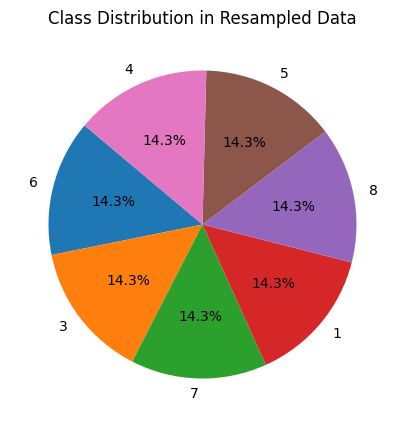

In [36]:
import matplotlib.pyplot as plt

labels = resampled_data['label'].value_counts().index
sizes = resampled_data['label'].value_counts().values

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Resampled Data')
plt.show()


In [33]:
print(resampled_data)
test_data.to_csv('/kaggle/working/resampled_data.csv', index=False)

         timestamp_seconds    back_x    back_y    back_z   thigh_x   thigh_y  \
0             1.617029e+09 -0.971680 -0.072266 -0.175781 -1.712158 -0.120117   
1             1.617029e+09 -1.364746  0.182861 -0.377197 -1.580322 -0.170166   
2             1.617029e+09 -1.249512  0.182129 -0.466553 -1.052734 -0.261719   
3             1.617029e+09 -0.841553 -0.026855 -0.445557 -0.863281 -0.132568   
4             1.617029e+09 -0.669189 -0.068115 -0.380371 -0.720215 -0.083496   
...                    ...       ...       ...       ...       ...       ...   
6087825       1.616597e+09 -0.140625 -0.015625  0.906250 -0.128932 -0.125000   
6087826       1.622109e+09 -0.904337  0.363364  0.001718  0.198820 -0.172945   
6087827       1.618325e+09 -0.498649  0.000000  0.781006  0.186251  0.071107   
6087828       1.621597e+09 -0.002859 -0.591876  0.833693 -0.214363  0.590068   
6087829       1.621607e+09 -0.500000  0.062227  0.734375  0.218936 -0.070068   

          thigh_z  label  
0        1.5

In [38]:
print(resampled_data.describe())

       timestamp_seconds        back_x        back_y        back_z  \
count       6.087830e+06  6.087830e+06  6.087830e+06  6.087830e+06   
mean        1.619234e+09 -8.316408e-01 -2.863694e-02  1.643202e-02   
std         1.610176e+06  3.000578e-01  1.603305e-01  4.539150e-01   
min         1.616597e+09 -4.333252e+00 -2.031006e+00 -2.204834e+00   
25%         1.618326e+09 -9.859141e-01 -1.003420e-01 -2.974116e-01   
50%         1.619446e+09 -9.331772e-01 -1.540179e-02 -1.408690e-01   
75%         1.620403e+09 -8.110350e-01  6.250000e-02  3.073730e-01   
max         1.622111e+09  3.630370e-01  1.576660e+00  1.179199e+00   

            thigh_x       thigh_y       thigh_z         label  
count  6.087830e+06  6.087830e+06  6.087830e+06  6.087830e+06  
mean  -6.639002e-01  1.841256e-02 -4.297237e-01  4.857143e+00  
std    4.967828e-01  2.401486e-01  4.526260e-01  2.231500e+00  
min   -7.942139e+00 -5.142578e+00 -7.593750e+00  1.000000e+00  
25%   -9.790434e-01 -1.110840e-01 -9.572344e-01  

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

# Define a RandomForest class
class RandomForest:
    def __init__(self, n_trees=100, max_depth=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        # Create and fit decision trees using bootstrapped samples
        for _ in range(self.n_trees):
            X_boot, y_boot = resample(X, y, replace=True, random_state=42)
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=42)
            tree.fit(X_boot, y_boot)
            self.trees.append(tree)
    
    # Method to make predictions using the random forest model
    def predict(self, X):
        # Make predictions using all the trees and return the majority vote
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)

# Prepare the data for training and testing
X_resampled = resampled_data.drop('label', axis=1).values
y_resampled = resampled_data['label'].values

train_size = int(0.8 * len(X_resampled))
X_train, X_test = X_resampled[:train_size], X_resampled[train_size:]
y_train, y_test = y_resampled[:train_size], y_resampled[train_size:]

# Train the random forest model
random_forest = RandomForest(n_trees=10, max_depth=None)
random_forest.fit(X_train, y_train)

# Make predictions and evaluate accuracy
predictions = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")